#**Multiple Linear Regression**

In this notebook, we will focus on Multiple Linear Regression using numpy and pandas.

General equation of Multiple Linear Regression:

**Y = β0 + β1X1 + β2X2 + … + βpXp + ε**

**Y:** The response variable

**Xj:** The jth predictor variable

**βj:** The average effect on Y of a one unit increase in Xj, holding all other predictors fixed

**ε:** The error term


# **Load The Data**

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df= pd.read_csv("C:\\Users\\User\\Downloads\\Real-estate1.csv", index_col =0)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.9845,5,24.98746,121.54391,54.8
5,2012.833,5,390.5684,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.015,0,24.94155,121.50381,15.4
411,2012.917,2,1455.798,1,24.9512,121.549,25.6
412,2013.250,18.8,390.9696,7,24.97923,121.53986,40.6


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     410 non-null    float64
 1   X2 house age                            410 non-null    object 
 2   X3 distance to the nearest MRT station  408 non-null    object 
 3   X4 number of convenience stores         412 non-null    int64  
 4   X5 latitude                             412 non-null    object 
 5   X6 longitude                            412 non-null    object 
 6   Y house price of unit area              411 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 41.9+ KB


# **Data Preprocessing**

# **Handling Missing Values:**

In [17]:
def handle_missing_values(df):
    # for col in df.columns:
    #     df[col] = df[col].replace(['?', '121.nan'], np.nan)  
    #     if df[col].isnull().any():  
    #         mode_value = df[col].mean()[0] 
    #         df[col].fillna(mode_value) 
    return df.fillna(df.mean())


# **Test case**
x: [24.98298, 24.9796, nan, 324.9795, nan, 24.98034, 24.98746, 24.96515,24.97744,nan]

y: [37.9, 38.1, nan, 36.5864, nan, 42,2, 47.3, 39.3, 71.3, nan]


In [ ]:
cleaned_data_missing = handle_missing_values(data)

# **Removing Duplicates:**

In [9]:
def remove_duplicates(df):
    return df.drop_duplicates()

cleaned_data_duplicates = remove_duplicates(df)

# **Test Case**
x: [32, 32, 19.5, 13.5, 6.3,10.5, 14.7, 29.3, 29.3]

y: [37.9, 37.9, 42.2, 47.3, 58.1, 51.6,  24.6, 27, 27]

In [ ]:
cleaned_data_duplicates = remove_duplicates(test_data)

# **Handle Outliers**

In [11]:
def handle_outliers(df, column):
    c = df[column]
    Q1 = np.percentile(c, 25)
    Q3 = np.percentile(c, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    maxout = df[c > upper].index
    minout = df[c < lower].index
    df.loc[maxout, column] = upper
    df.loc[minout, column] = lower
    print(upper, lower)
    return df

# cleaned_data_outliers = handle_outliers(df, 'diabetes')

# **Test Case**
x: [32, 89.5, 19.5, 13.5, 6.3,10.5, 14.7, 29.3, 70.5]

y: [37.9, 110.7, 42.2, 47.3, 58.1, 51.6,  24.6, 27,99.4]



In [ ]:
cleaned_data_outliers = handle_outliers(test_data, 'y')

# **Normalizing Data**
In Machine Learning, we often need to deal with normalization. Normalization is the process of scaling the data to the range of 0 to 1. In this exercise, we will use `MinMaxScaler()`.

The calculation of `MinMaxScaler()` is as below:
$$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}}$$



In [13]:
def normalize_data(df, columns):
    x = df[columns]
    minx, maxx = min(x), max(x)
    y = (x - minx) / (maxx - minx)
    df[columns] = y
    return df

# cleaned_data_standardized = standardize_data(data, ['x1', 'x2'])

# **Test Case**
x: [32, 12.7, 19.5, 13.5, 6.3,10.5, 14.7, 29.3, 8.1]

y: [37.9, 32.3, 42.2, 47.3, 58.1, 51.6,  24.6, 27, 52.5]

In [21]:
x = [32, 12.7, 19.5, 13.5, 6.3,10.5, 14.7, 29.3, 8.1]
# y = [37.9, 32.3, 42.2, 47.3, 58.1, 51.6, 24.6, 27, 52.5]
y = pd.DataFrame(x)
normalize_data(y, 0)

,0
0,1.000000
1,0.249027
2,0.513619
3,0.280156
4,0.000000
5,0.163424
6,0.326848
7,0.894942
8,0.070039


In [25]:
df= pd.read_csv("C:\\Users\\User\\Downloads\\Real-estate1.csv", index_col =0)


for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
    df[col] = df[col].astype(float)
df = handle_missing_values(df)
df = remove_duplicates(df)
df
# for i in df.columns:
#     df[i] = df[i].astype(float)
#     df[i] = pd.to_numeric(df[i])

    
for i in df.columns: 
    df = handle_outliers(df, i)
    df = normalize_data(df, i) 
# df
df.info()
df = df.fillna(df.mean())
df


2014.167 2012.167
57.0125 -19.687500000000004
3194.1153000000004 -1453.5495
13.5 -6.5
24.99906000000001 24.94141999999999
121.56479875 121.50760875
74.57500000000002 -0.4250000000000078
<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     412 non-null    float64
 1   X2 house age                            412 non-null    float64
 2   X3 distance to the nearest MRT station  412 non-null    float64
 3   X4 number of convenience stores         412 non-null    float64
 4   X5 latitude                             412 non-null    float64
 5   X6 longitude                            412 non-null    float64
 6   Y house price of unit area              412 non-null    float64
dtypes: float64(7)
memory usage: 41.9 KB


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,0.272926,0.561280,0.019395,1.0,0.721027,0.570576,0.452408
2,0.272926,0.342030,0.089321,0.9,0.675226,0.557812,0.516611
3,1.000000,0.233282,0.169867,0.5,0.798751,0.634748,0.592758
4,0.909389,0.233282,0.169867,0.5,0.798751,0.634748,0.704741
5,0.181223,0.087700,0.115805,0.5,0.658397,0.609219,0.530049
...,...,...,...,...,...,...,...
409,0.818777,0.324490,0.678821,0.3,0.379598,0.084302,0.306084
410,0.363537,0.240298,1.000000,0.0,0.002255,0.000000,0.116461
412,0.636463,0.329752,0.115931,0.7,0.655968,0.563932,0.492721


# **Find Correlation between Target Varible and Feature**     

       X1 transaction date  X2 house age  \
count           412.000000    412.000000   
mean              0.529523      0.313621   
std               0.306216      0.204547   
min               0.000000      0.000000   
25%               0.272926      0.159176   
50%               0.545852      0.284148   
75%               0.818777      0.495505   
max               1.000000      1.000000   

       X3 distance to the nearest MRT station  \
count                              412.000000   
mean                                 0.302933   
std                                  0.304553   
min                                  0.000000   
25%                                  0.083874   
50%                                  0.154275   
75%                                  0.450324   
max                                  1.000000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       412.000000   412.000000    412.000000   
mean                   

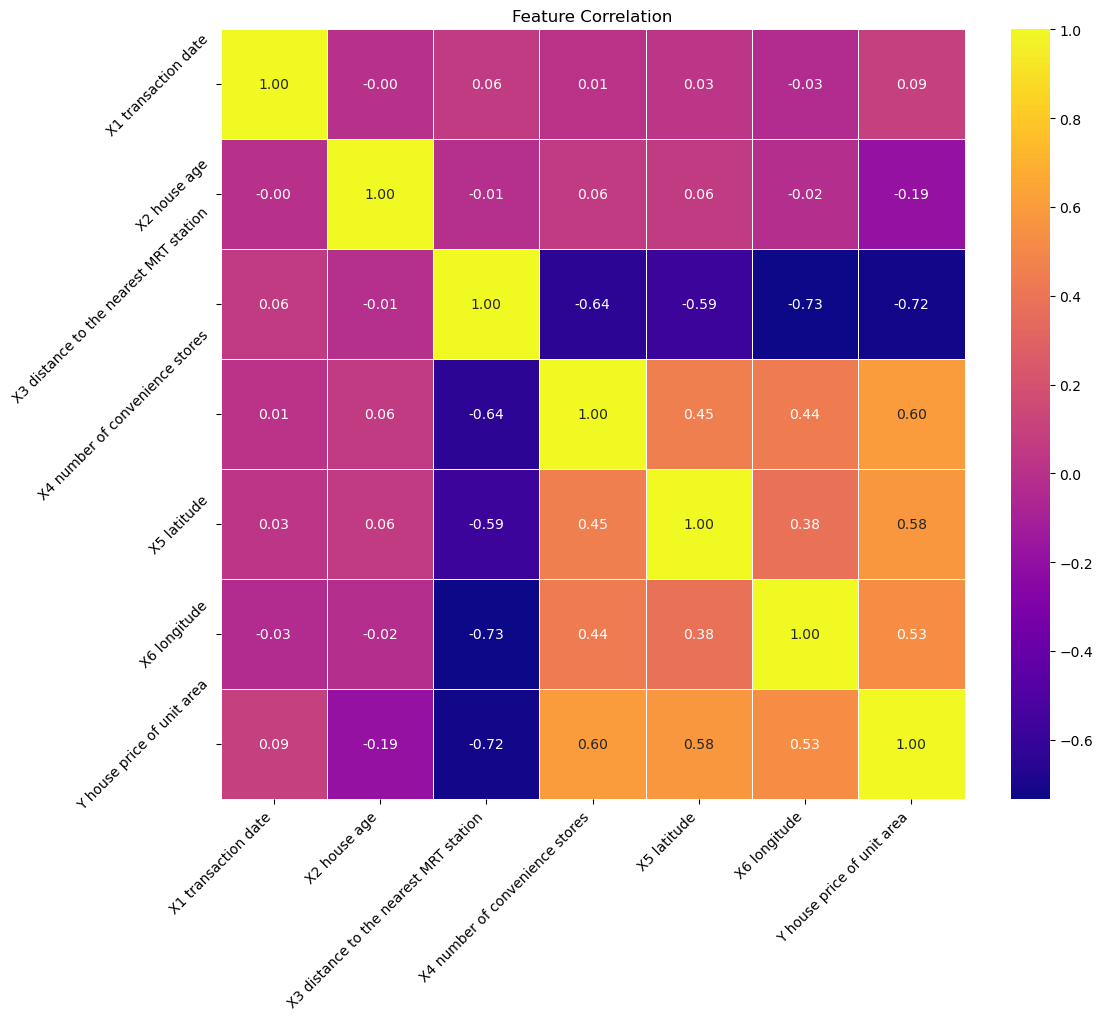

In [27]:
import numpy as np
import matplotlib.pyplot as plt
print(df.describe())

plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='plasma', linewidths=0.5)
plt.title('Feature Correlation')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

# Show the plot
plt.show()


# **Calculate X1^2,X2^2, X1y, X2y and X1X2**

In [122]:
data = df.to_numpy()
print(data.shape)
X , Y = data[:,:-1] , data[:, -1].reshape(-1,1)
x1, x2 = data[:, 3].reshape(-1,1) , data[:, 4].reshape(-1,1)


x1_squared, x2_squared = x1**2, x2**2
x1y, x2y = x1*Y , x2*Y
x1x2 = x1*x2
x1_squared

(412, 7)


array([[1.  ],
       [0.81],
       [0.25],
       [0.25],
       [0.25],
       [0.09],
       [0.49],
       [0.36],
       [0.01],
       [0.09],
       [0.01],
       [0.81],
       [0.25],
       [0.16],
       [0.16],
       [0.04],
       [0.36],
       [0.01],
       [0.64],
       [0.49],
       [0.09],
       [0.49],
       [0.01],
       [0.49],
       [0.16],
       [0.04],
       [0.25],
       [0.25],
       [0.16],
       [0.25],
       [0.  ],
       [0.49],
       [0.01],
       [0.36],
       [0.49],
       [0.  ],
       [0.04],
       [0.01],
       [0.36],
       [0.25],
       [0.  ],
       [0.  ],
       [0.25],
       [0.36],
       [0.16],
       [0.64],
       [0.81],
       [0.09],
       [0.  ],
       [0.01],
       [0.16],
       [0.01],
       [0.09],
       [0.25],
       [0.25],
       [0.  ],
       [0.64],
       [0.49],
       [0.01],
       [0.25],
       [0.04],
       [0.36],
       [0.09],
       [0.16],
       [0.  ],
       [0.64],
       [0.

# **Calculate Regression Sums**
$$\Sigma x_1^2 = \frac{\Sigma X_1^2}{n} - \frac{(\Sigma X_1)^2}{n}$$
$$\Sigma x_1^2 = \frac{\Sigma X_2^2}{n} - \frac{(\Sigma X_2)^2}{n}$$
$$\Sigma x_1y = \frac{\Sigma X_1y}{n} - \frac{\Sigma X_1 \Sigma y}{n}$$
$$\Sigma x_2y = \frac{\Sigma X_2y}{n} - \frac{\Sigma X_2\Sigma y}{n}$$
$$\Sigma x_1x_2 = \frac{\Sigma X_1X_2}{n} - \frac{\Sigma X_1 \Sigma X_2}{n}$$




In [124]:
x1reg =x1.mean()
x2reg =x2.mean()

x1sqreg =x1_squared.mean()
x2sqreg =x2_squared.mean()

x1yreg =x1y.mean()
x2yreg =x2y.mean()

x1x2reg = x1x2.mean()
yreg = Y.mean()

# ** Calculate b0, b1, and b2**

$$
b_1 = \frac{[(\Sigma x_2^2)(\Sigma x_1y) - (\Sigma x_1x_2)(\Sigma x_2y)]}{[(\Sigma x_1^2)(\Sigma x_2^2) - (\Sigma x_1x_2)^2]}
$$

$$
b_2 = \frac{[(\Sigma x_1^2)(\Sigma x_2y) - (\Sigma x_1x_2)(\Sigma x_1y)]}{[(\Sigma x_1^2)(\Sigma x_2^2) - (\Sigma x_1x_2)^2]}
$$

$$
b_0 = \bar{y} - b_1\bar{X}_1 - b_2\bar{X}_2
$$



In [127]:
b1 = np.abs((x2sqreg * x1yreg) - (x1x2reg * x2yreg)) / np.abs((x1sqreg * x2sqreg) - (x1x2reg**2) )
b2 = np.abs((x1sqreg * x2yreg) - (x1x2reg * x1yreg)) / np.abs((x1sqreg * x2sqreg) - (x1x2reg**2) )
b0 = yreg - b1*x1reg - b2*x2reg
# b0 = b0.to_numpy()


# **Estimated Linear Regression Equation**:

$$ŷ = b₀ + b₁ * x₁ + b₂ * x₂$$

In [107]:
ypred = b0.reshape(-1,1) + (b1 * x1) + (b2 *x2)

# **Plot the Predictive line**

Theta: [0.0255907  0.32496987 0.61088491] Shape: (3,)
(3,) (412,)


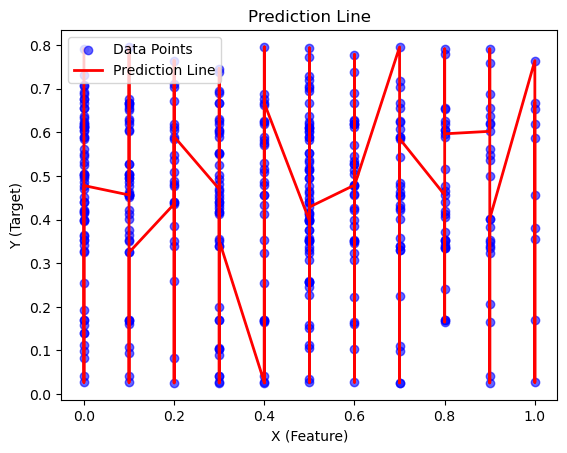

(3,) (412,)


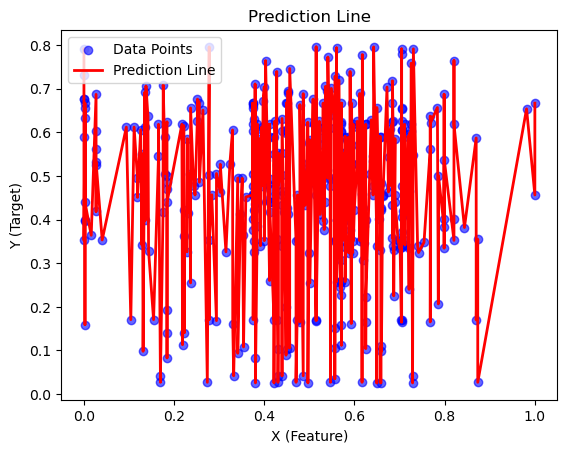

In [118]:
import matplotlib.pyplot as plt
import numpy as np

def plot_best_fit_line(X, Y, theta):
    if X.ndim > 1:
        X = X.flatten()
    
    X_sorted = np.sort(X) 
    print(theta.shape, X_sorted.shape)
    # Y_pred = []
    # for x in X_sorted:
    #     Y_pred.append(predict(x, theta))
    
    plt.scatter(X_sorted, Y, color='blue', label='Data Points', alpha=0.6)
    
    plt.plot(X_sorted, Y, color='red', label='Prediction Line', linewidth=2)

    # plt.scatter(X[:,0, Y, color='blue', label='Data Points', alpha=0.6)
    
    # plt.plot(X_sorted, Y, color='red', label='Best Fit Line', linewidth=2)
    
    plt.xlabel("X (Feature)")
    plt.ylabel("Y (Target)")
    plt.title("Prediction Line")
    plt.legend()
    plt.show()

b1 = np.abs((x2sqreg * x1yreg) - (x1x2reg * x2yreg)) / np.abs((x1sqreg * x2sqreg) - (x1x2reg**2) )
b2 = np.abs((x1sqreg * x2yreg) - (x1x2reg * x1yreg)) / np.abs((x1sqreg * x2sqreg) - (x1x2reg**2) )
b0 = yreg - b1*x1reg - b2*x2reg
# theta = np.array([b0.to_numpy(),b1,b2])
# plot_best_fit_line(x1, ypred, theta)


# Ensure b0 is a scalar
if isinstance(b0, pd.Series) and len(b0) == 1:
    b0 = b0.iloc[0]

# Create the theta array
theta = np.array([b0, b1, b2])
print("Theta:", theta, "Shape:", theta.shape)

# Call the plot function
plot_best_fit_line(x1, ypred, theta)
plot_best_fit_line(x2, ypred, theta)
# plot_best_fit_line(X, ypred, theta)


# plot_best_fit_line(Xtest, Ytest, theta)


# **Implement Multiple Linear Regression Model using Scikit Learn**

[0.28032651 0.35413652]
Intercept (b0): 0.1647583657071618, Coefficients (b1, b2): 0.2803265126128372, 0.3541365194807554


C:\Users\User\AppData\Local\Temp\ipykernel_15200\2748908790.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b0 = float(b0)


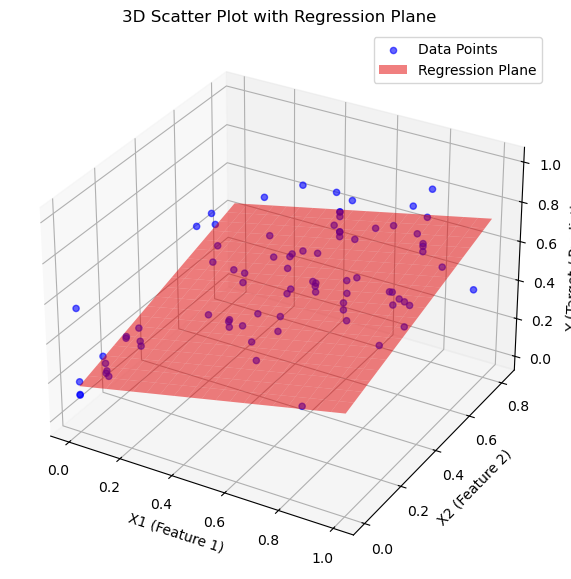

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.column_stack((x1, x2))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

b0 = mlr.intercept_         
coefficients = mlr.coef_    
print(coefficients.ravel())

b1, b2 = coefficients.ravel()      

b0 = float(b0)
b1 = float(b1)
b2 = float(b2)
theta = np.array([b0, b1, b2])
print(f"Intercept (b0): {b0}, Coefficients (b1, b2): {b1}, {b2}")

y_pred_test = mlr.predict(X_test)

def predict_3d(x1, x2, theta):
    return theta[0] + theta[1] * x1 + theta[2] * x2

def plot_3d_scatter_with_plane(x1, x2, y, theta):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x1, x2, y, color='blue', label='Data Points', alpha=0.6)
    x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 20),
                                   np.linspace(min(x2), max(x2), 20))
    y_pred_grid = predict_3d(x1_grid, x2_grid, theta)
    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5, label='Regression Plane')

    ax.set_xlabel("X1 (Feature 1)")
    ax.set_ylabel("X2 (Feature 2)")
    ax.set_zlabel("Y (Target / Predictions)")
    ax.set_title("3D Scatter Plot with Regression Plane")
    plt.legend()
    plt.show()

plot_3d_scatter_with_plane(X_test[:, 0], X_test[:, 1], y_test, theta)


# **Plot the Best Fit Line**

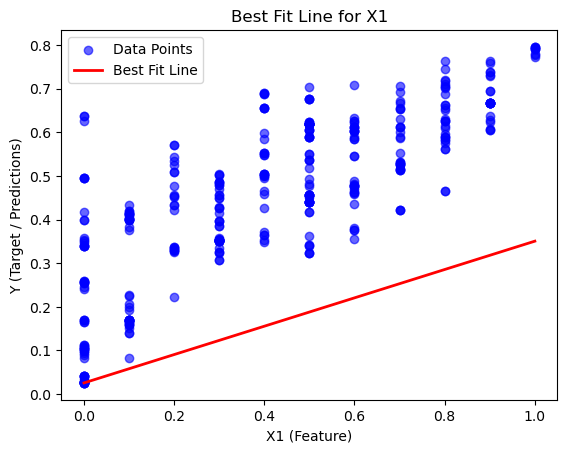

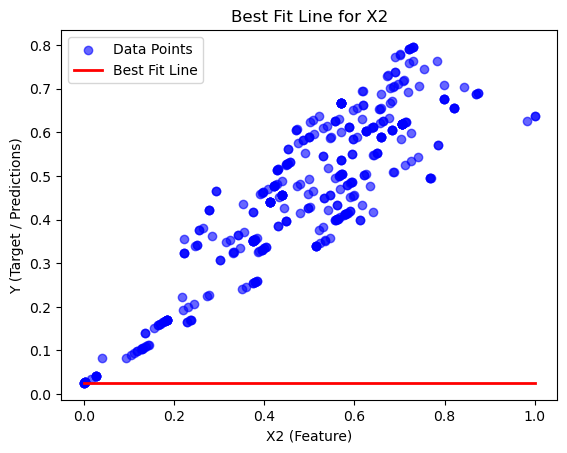

In [112]:
import matplotlib.pyplot as plt
import numpy as np

def predict(X, theta):
    return theta[0] + theta[1] * X

def plot_best_fit_line(X, Y, theta, feature_name="Feature"):
    if X.ndim > 1:
        X = X.flatten()
    
    X_sorted = np.sort(X)
    Y_pred = predict(X_sorted, theta)  
    plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.6)
    
    # Plot the best fit line
    plt.plot(X_sorted, Y_pred, color='red', label='Best Fit Line', linewidth=2)

    plt.xlabel(f"{feature_name} (Feature)")
    plt.ylabel("Y (Target / Predictions)")
    plt.title(f"Best Fit Line for {feature_name}")
    plt.legend()
    plt.show()


theta = np.array([b0, b1, b2])  # Regression coefficients

plot_best_fit_line(x1, ypred, theta=np.array([b0, b1, 0]), feature_name="X1")

plot_best_fit_line(x2, ypred, theta=np.array([b0, 0, b2]), feature_name="X2")


3d_scatter_with_plane(x1, x2, ypred, theta)


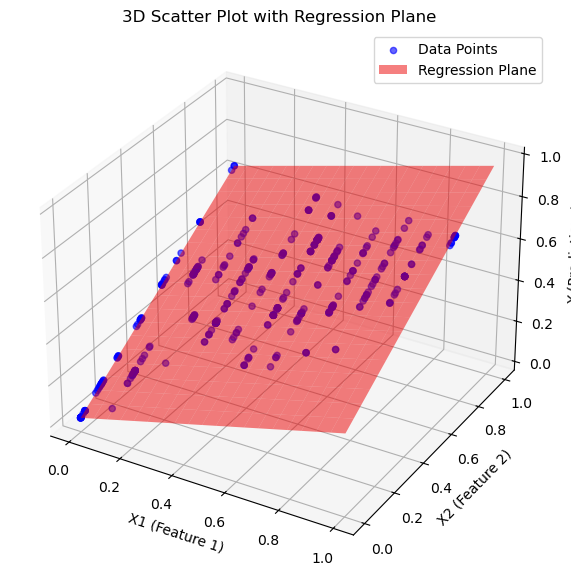

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to predict Y values based on x1, x2, and regression coefficients
def predict_3d(x1, x2, theta):
    return theta[0] + theta[1] * x1 + theta[2] * x2

# Function to plot 3D scatter plot and regression plane
def plot_3d_scatter_with_plane(x1, x2, y, theta):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for actual data points
    ax.scatter(x1, x2, y, color='blue', label='Data Points', alpha=0.6)

    # Generate grid for the regression plane
    x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 20),
                                   np.linspace(min(x2), max(x2), 20))
    y_pred_grid = predict_3d(x1_grid, x2_grid, theta)

    # Plot the regression plane
    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5, label='Regression Plane')

    # Axis labels
    ax.set_xlabel("X1 (Feature 1)")
    ax.set_ylabel("X2 (Feature 2)")
    ax.set_zlabel("Y (Predictions)")
    ax.set_title("3D Scatter Plot with Regression Plane")
    plt.legend()
    plt.show()


theta = np.array([b0, b1, b2])  
plot_3d_scatter_with_plane(x1, x2, ypred, theta)
